# ggplot in Python

## Introduction

This tutorial will introduce the reader to the python package ggplot, the python equivalent of Hadley Wickham's immensely popular R package, ggplot2.  ggplot2 is a graphics and visualizations package, based on the Grammer of Graphics, in the statistical language, R.  The Grammer of Graphics is built around graphics as the summation of building blocks.  These building blocks include data, aesthetics, statistical transformations, and faceting.  

## Why ggplot

For those readers with background in R, the use of ggplot is obvious.  The ggplot package for python is virtually identical to the R package.  For those readers unfamiliar with R and ggplot, ggplot has a number of distinct advantages over some other graphics packages:
* With the use of "building blocks", superposition of information is extremely simple.
* Multiple data sets can easily be presented in the same plot.
* Faceting can be done without the use of loops.
* There is a heavily active community of users, tutorials, guides and question/answers available online.
* Geoms are intuitive to use.
* The package is built upon one of the major schools of data visualization.

## Tutorial Content

In this tutorial we will cover some of the most important and impressive features of ggplot.  We will use the builtin datasets; more information on those can be found at http://docs.ggplot2.org/current/.  ggplot will work with most datasets, provided the data is in readable formats.  

We will cover the following topics in this tutorial:
- [Set up](#Set-up)
- [Scatterplots](#Scatterplots)
- [Histograms](#Histograms)
- [Density plots](#Density-plots)
- [Bar Charts](#Bar-charts)
- [Faceting](#Faceting)
- [Smoothing Lines](#Smoothing-Lines)
- [Themes](#Themes)

## Set up

If `ggplot` is not installed it can be installed using `pip install` in the command line or through the git: https://github.com/yhat/ggplot.

In [5]:
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install ggplot

We will begin by importing three packages needed for ggplot.  `numpy` gives us access to needed mathematical functions, pandas gives us access to dataframes, the preferred method for data in R, and matplotlib.pyplot gives us access to what is considered python's more traditional graphics and visualization package.

Without `matplotlib` the graphs will open in a separate window.

In [6]:
import numpy as np
import pandas as pd
#import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from ggplot import *
#from scipy.stats import iqr

For our tutorial we will use two of `ggplot`'s built in datasets: `diamonds` and `mtcars`.  Below we call `.head()` to visibly display the data stored in those two  datasets.  

In [50]:
mtcars['gear'] = mtcars['gear'].astype('category')

print mtcars.head()

print diamonds.head()

                name   mpg  cyl   disp   hp  drat     wt   qsec  vs  am gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1    4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1    4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1    4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0    3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0    3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


## Scatterplots

A scatterplot is one of the most used plots in the statistical and data science world.  Since both the dependent and independent variables are quantatative, scatterplots can be used with regression, distributions and other statistical needs.  Our scatterplot will plot miles per gallon (`mpg`) versus horsepower (`hp`) of the `mtcars` dataset.  We start by creating a ggplot object.

In [10]:
mpg_hp_scatter = ggplot(mtcars, aes(x = 'hp', y = 'mpg')) 

type(mpg_hp_scatter)

ggplot.ggplot.ggplot

We add `geom_point()` to our object to make our scatterplot.  We will also add labels and a title to our plot using `xlab` and `ylab` to add axis labels and `ggtitle` to add the title.

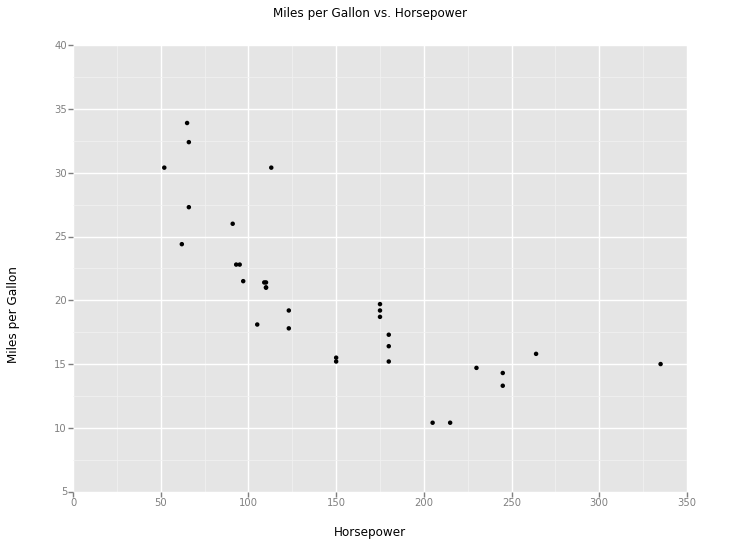

<ggplot: (17214342)>

In [11]:
mpg_hp_scatter = mpg_hp_scatter + \
                    ylab('Miles per Gallon') + \
                    xlab("Horsepower") + \
                    ggtitle("Miles per Gallon vs. Horsepower")

mpg_hp_scatter_wg = mpg_hp_scatter + geom_point()      

mpg_hp_scatter_wg

The plot above shows the miles per gallon versus the horsepower of the `mtcars` dataset.  There is a clear negative relationship between the two variables as evidenced by the increasing horsepower and decreasing miles per gallon.

Below we have plotted the same scatterplot, with the addition of a third variable `gear` which colors the points of the plot.Wi

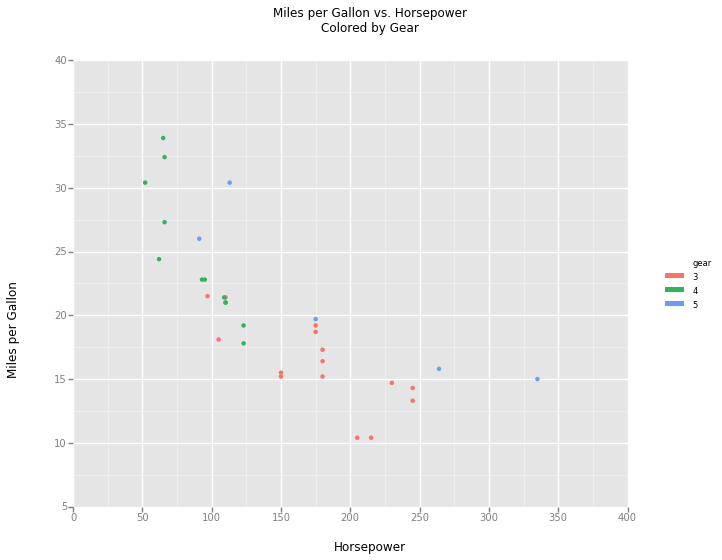

<ggplot: (24499835)>

In [51]:
mpg_hp_wc_scatter = ggplot(mtcars, aes(x = 'hp', y = 'mpg', color = 'gear')) 

mpg_hp_wc_scatter = mpg_hp_wc_scatter + \
                    ylab('Miles per Gallon') + \
                    xlab("Horsepower") + \
                    ggtitle("Miles per Gallon vs. Horsepower\nColored by Gear")

mpg_hp_wc_scatter_wg = mpg_hp_wc_scatter + geom_point()      

mpg_hp_wc_scatter_wg

With the addition of the coloring above we can see both the relationship between horsepower and mpg as well as the distribution of gears across that relationship.

## Histograms

Histograms are statistical visualizations used to display the frequency, range and skew of one quantitative variable.  Using our `mtcars` dataset, we will graph `mpg`.

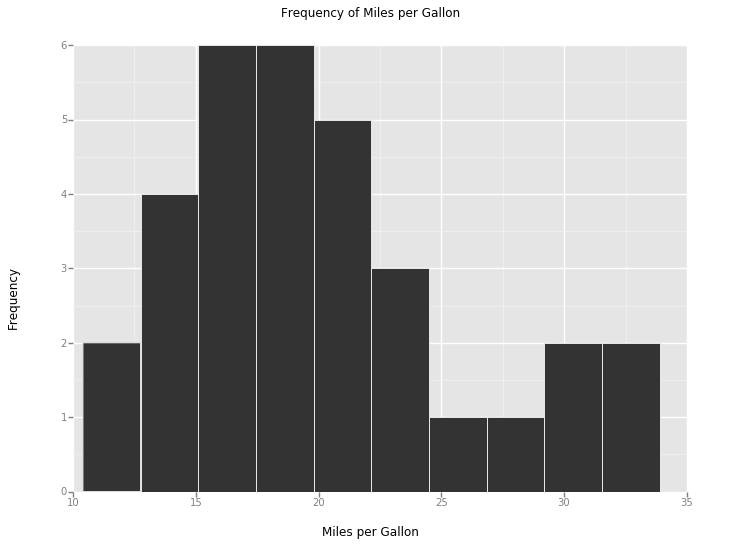

<ggplot: (24541546)>

In [34]:
mpg_hist = ggplot(mtcars, aes(x = "mpg")) 

mpg_hist = mpg_hist + \
            xlab("Miles per Gallon") + \
            ylab("Frequency") + \
            ggtitle("Frequency of Miles per Gallon")

mpg_hist_wg = mpg_hist + geom_histogram()

mpg_hist_wg

We can see on the graph above that mpg is skewed right with a center around 17.  Since binsize and number are not statistically relevant in histograms we can adjust their values until we get the best possible histogram.

We will use the Freedman-Diaconis Rule, a statistical equation for selecting the proper binwidth.  Our function `best_binwidth` is the Freedman-Diaconis Rule in python.  The plot below is the same plot with an updated binwidth.

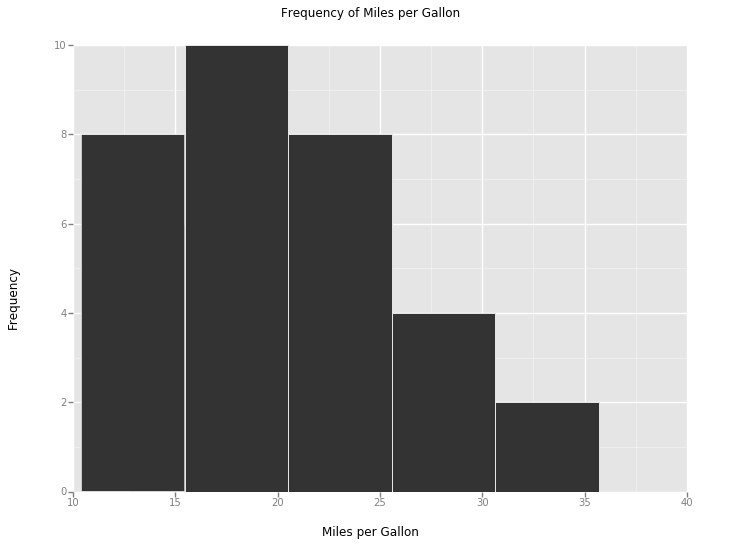

<ggplot: (24541546)>

In [35]:
def best_binwidth(x):
    
    iqr = float(np.subtract(*np.percentile(x, [75, 25])))
    iqr = 2 * iqr
    
    leng = len(x)
    leng = leng**(1/3.0)
    
    divisor = iqr / leng
    
    xmax =  x.max() / divisor
    xmin =  x.min() / divisor
    
    return (xmax - xmin)

mpg_hist_bb_wg = mpg_hist + geom_histogram(binwidth = best_binwidth(mtcars['mpg']))
            
mpg_hist_bb_wg

Additionally, we can add lines to our plot to better display some information.  In the graph below, we have added a red line for the mean of the data and a green line for the median.

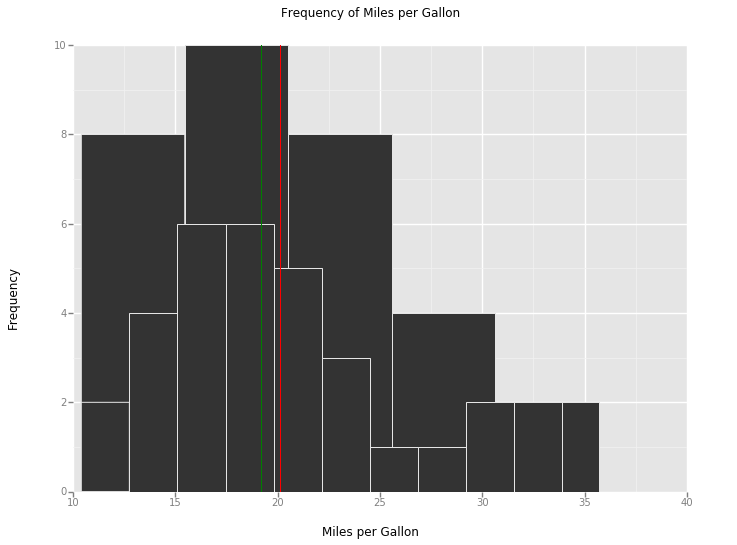

<ggplot: (24541546)>

In [36]:
mpg_hist_wg_lines = mpg_hist + \
                                geom_histogram() + \
                                geom_vline(x = mtcars["mpg"].mean(), color = "red") + \
                                geom_vline(x = mtcars["mpg"].median(), color = "green") 
            
mpg_hist_wg_lines

Since the mean of the plot above is larger than the median.  Our initial thoughts on the skew are shown to be accurate.

## Density Plots

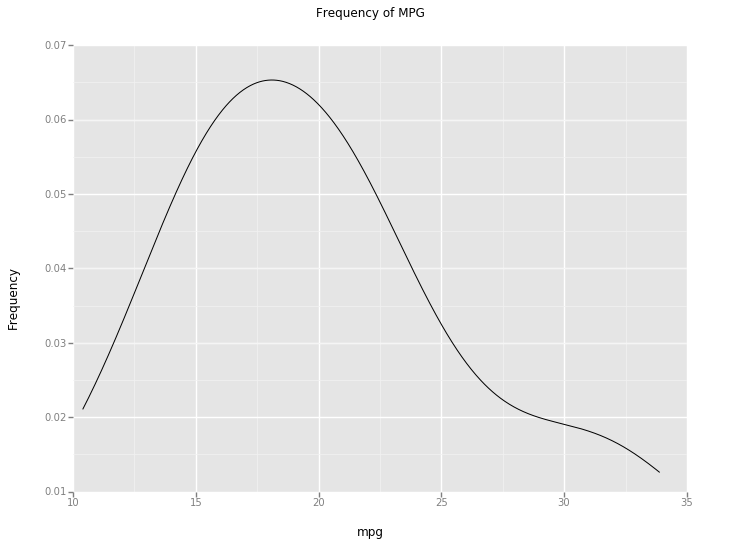

<ggplot: (25676064)>

In [40]:
mpg_density = ggplot(mtcars, aes(x = "mpg"))
mpg_density = mpg_density + \
                    xlab("mpg") +\
                    ylab("Frequency") +\
                    ggtitle("Frequency of MPG")
            
mpg_density_wg = mpg_density + geom_density()

mpg_density_wg

While histograms are a poweful way to view the distribution of quantatative variables, we can also use density plots to display the same information in a different format.  Density plots display the densities of a quantatiative variable in line format instead of the histograms bars.  To create a density plot, we use `geom_density` to create the plot.  We will continue to use our mpp example.

In comparison to the histograms above, our density plot shows the distribution of mpg with a single line.  We continue to see the right skew we discussed earlier and the center between 15 - 20.  As we mentioned above, there are those who find density plots easier to read than histograms and vice versa, it is a matter of preference for many of the visualization the reader will need.

ggplot can also display multiple distributions if we split the variable based on another variable.  To do this, we add a parameter to our initial `ggplot ` call.  In our example below, we have set the parameter `color` to `gear` one of the other variables in the dataset.    

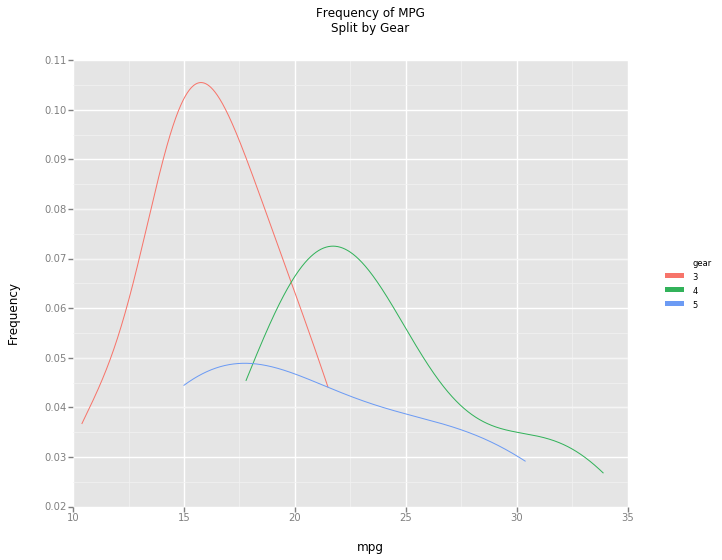

<ggplot: (25664702)>

In [52]:
mpg_g_density = ggplot(mtcars, aes(x = "mpg", color = "gear"))
mpg_g_density = mpg_g_density + \
                    xlab("mpg") +\
                    ylab("Frequency") +\
                    ggtitle("Frequency of MPG\nSplit by Gear")
            
mpg_g_density_wg = mpg_g_density + geom_density()

mpg_g_density_wg

We can see that the distributions of mpg are different for each of the gears.  Thus adding a categorical variable can add to an understanding of different variable.

Since histograms and density plots are different plot types of the same data, we can call `geom_histogram` instead of `geom_density` to get the histogram of the plot we above.

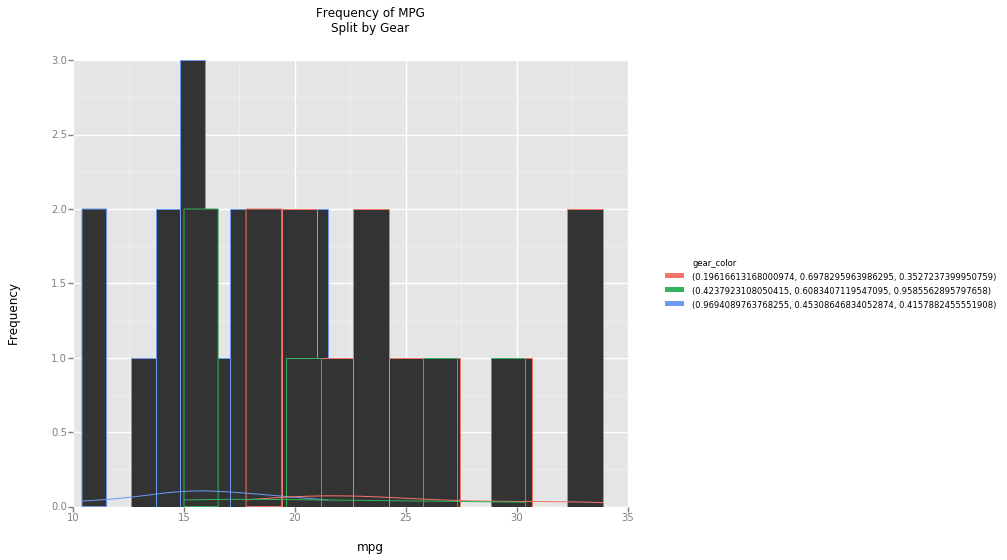

<ggplot: (25664702)>

In [53]:
mpg_g_hist_wg = mpg_g_density + geom_histogram()

mpg_g_hist_wg

## Bar Charts

Bar charts are often confused with histograms due to their visual similarities.  However, they display different types of data and different information can be gained each plot type.  Where histograms display one quantatative variable, bar charts display one categorical variable.  Since histograms display quantatitive data, the skew, mean and median are all statistical information that has meaning.  Since a bar chart displays the categories of a categorical variable, none of that information is sensical.

To create a bar chart in ggplot, we use `geom_bar`.  Below, we have plotted `cut` from the `diamond` dataset.

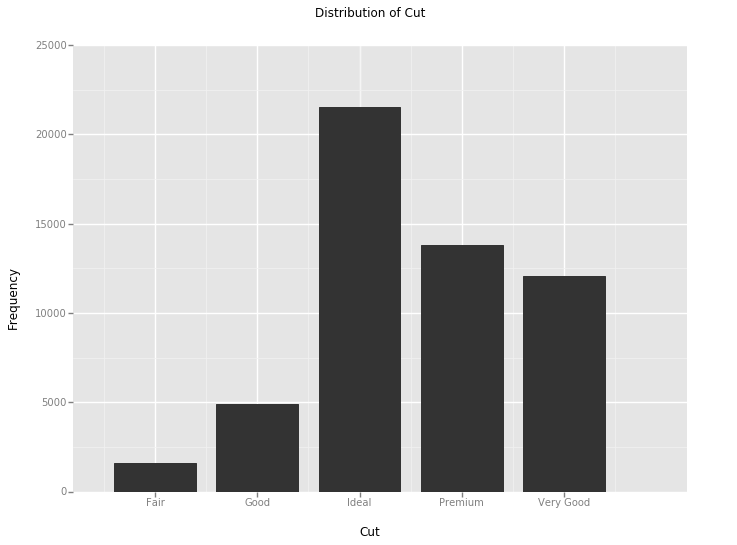

<ggplot: (19004592)>

In [19]:
cut_bar = ggplot(diamonds, aes(x = "cut"))
cut_bar = cut_bar + \
                    xlab("Cut") +\
                    ylab("Frequency") +\
                    ggtitle("Distribution of Cut")
            
cut_bar_wg = cut_bar + geom_bar()

cut_bar_wg

In a bar chart neither the order of the categories nor the width of the bars matters.  Generally the important part of the bar chart is the height of the bars.  In our example, Ideal is the most frequent in our dataset, while Fair is the least frequent.

If we wanted to see the frequency of one categorical variable split by another categorical variable, we have two options.  The first option is a stacked bar chart where each bar of the first variable is colored by another variable.  Below we have written a stacked bar chart of `cut` split by `color` by adding the `position` parameter to `geom_bar` and setting it equal to `stack`.

C:\Users\isaac\Anaconda2\lib\site-packages\ggplot\ggplot.py:602: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  fill_levels = self.data[[fillcol_raw, fillcol]].sort(fillcol_raw)[fillcol].unique()


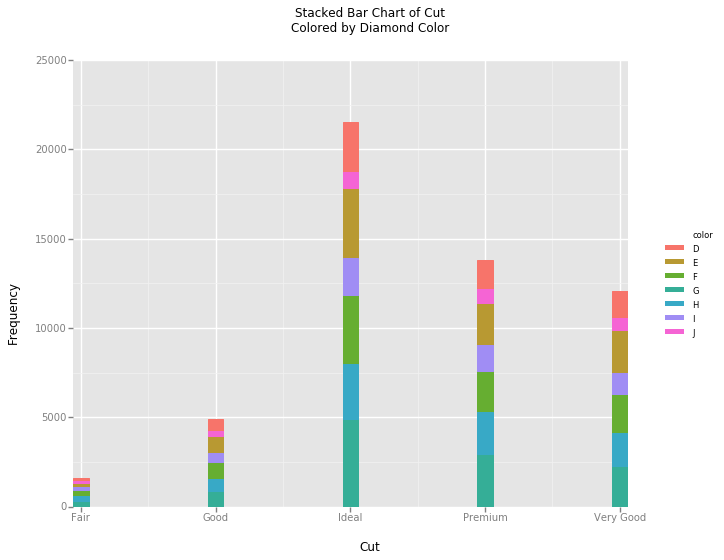

<ggplot: (17566258)>

In [20]:
cut_c_bar = ggplot(diamonds, aes(x = "cut", fill = "color"))
cut_c_bar = cut_c_bar + \
                    xlab("Cut") +\
                    ylab("Frequency") +\
                    ggtitle("Stacked Bar Chart of Cut\nColored by Diamond Color")
            
cut_c_bar_stack_wg = cut_c_bar + geom_bar(stat = "identity", position = "stack")

cut_c_bar_stack_wg

In our example, we see that the color G represents the largest part of the Ideal column, while in the Very Good column it appears with the same frequency as H.

The other way to display the data is with a side-by-side bar chart.  This is done by changing the `position` parameter to `dodge`.  Below we have plotted the same data with `position` changed.

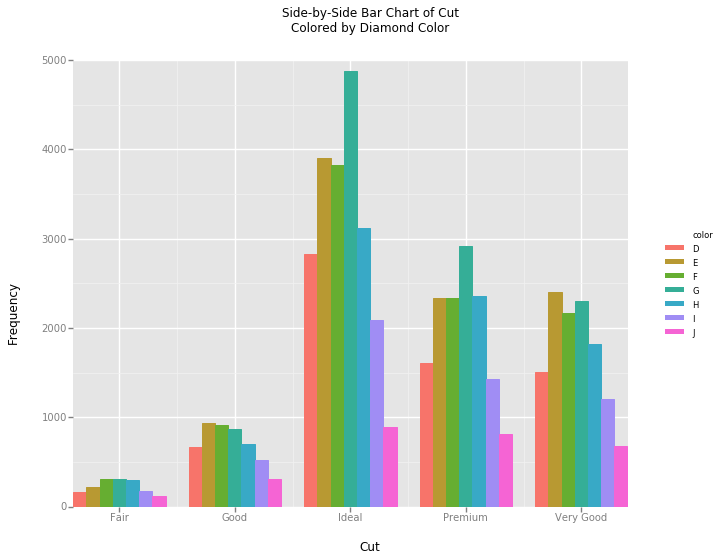

<ggplot: (17464149)>

In [21]:
cut_c_bar = ggplot(diamonds, aes(x = "cut", fill = "color"))
cut_c_bar = cut_c_bar + \
                    xlab("Cut") +\
                    ylab("Frequency") +\
                    ggtitle("Side-by-Side Bar Chart of Cut\nColored by Diamond Color")
            
cut_c_bar_dodge_wg = cut_c_bar + geom_bar(stat = "identity", position = "dodge")

cut_c_bar_dodge_wg

There are those who find the side-by-side bar chart easier to understand than the stacked bar chart.  This is a matter of preference and either can be used appropriately.  

## Faceting

Faceting is a method of splitting a plot by a categorical variable and plotting the resulting subsets of the data together.  Our first example will recreate the density plots of `mpg_density_wg`.  We will facet the dataset by `gear` so we can best compare it against our `mpg_g_density_wg` from earlier.

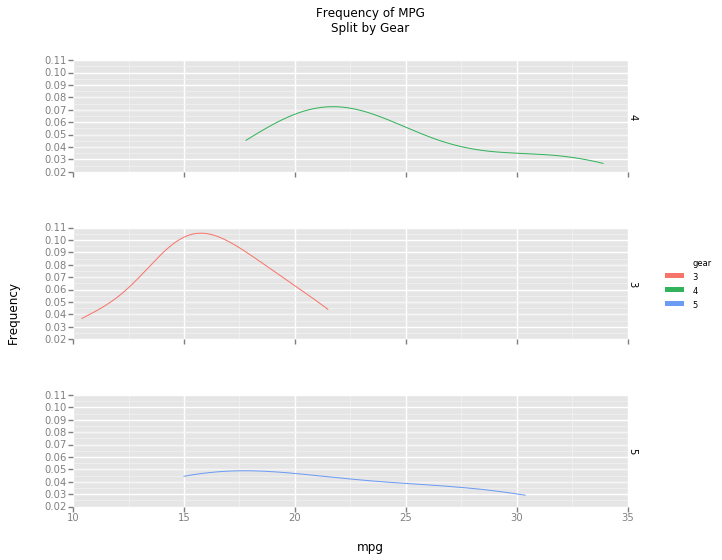

<ggplot: (26485024)>

In [54]:
mpg_g_density_facet = ggplot(mtcars, aes(x = "mpg", color = "gear"))
mpg_g_density_facet = mpg_g_density_facet + \
                    xlab("mpg") +\
                    ylab("Frequency") +\
                    ggtitle("Frequency of MPG\nSplit by Gear")
            
mpg_g_density_facet_wg = mpg_g_density_facet + geom_density() + facet_grid("gear")

mpg_g_density_facet_wg

The plot above displays the same information as `mpg_g_density_wg` with the different distributions on different plots.

We can also split plots of categorical distributions with facets as well.  We will recreate `cut_bar` and facet our bar charts by `color`.

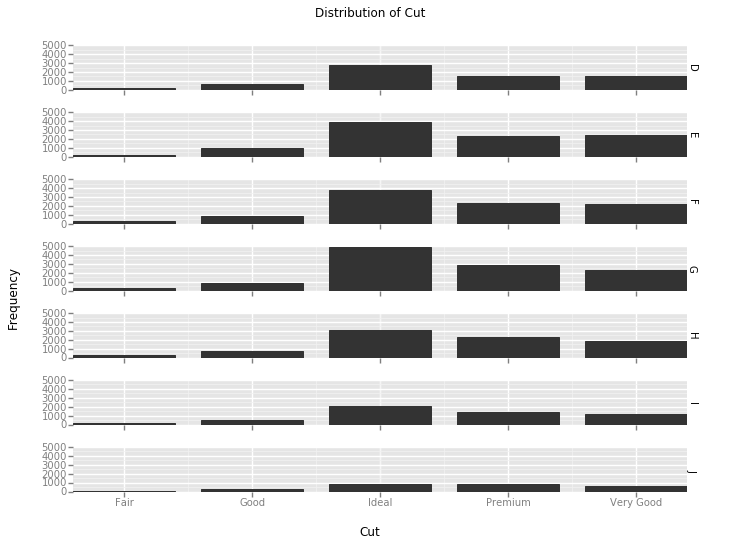

<ggplot: (22021647)>

In [23]:
cut_bar = ggplot(diamonds, aes(x = "cut"))
cut_bar = cut_bar + \
                    xlab("Cut") +\
                    ylab("Frequency") +\
                    ggtitle("Distribution of Cut")
            
cut_bar_facet_wg = cut_bar + geom_bar() + facet_grid("color")

cut_bar_facet_wg

## Smoothing Lines

Besides plotting data, ggplot can also plot regression lines.  Using `stat_smooth`, we can visualize different regression lines on scatter plots and other such plots.  As an example we will plot `mtcars` `disp` versus `hp`.  In other words, we will hypothesize that `disp` is dependent on `hp`.

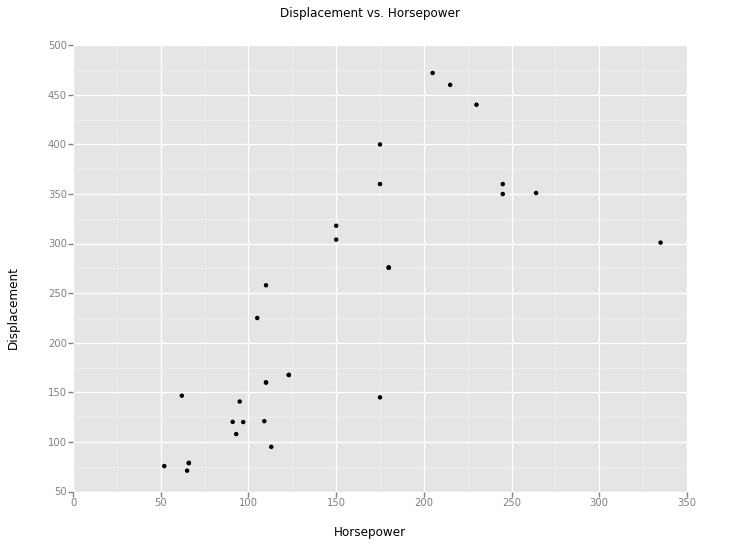

<ggplot: (24071614)>

In [24]:
disp_hp = ggplot(mtcars, aes(x = "hp", y = "disp"))
disp_hp = disp_hp + \
                    xlab("Horsepower") +\
                    ylab("Displacement") +\
                    ggtitle("Displacement vs. Horsepower")
            
disp_hp_wg = disp_hp + geom_point()

disp_hp_wg

We see a somewhat positive, linear relationship between horsepower and displacement, the smoothing lines may better display those relationships.

When we add in `geom_smooth` without any other parameters defined we get the same plot as above with the default smooth.

C:\Users\isaac\Anaconda2\lib\site-packages\ggplot\stats\stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


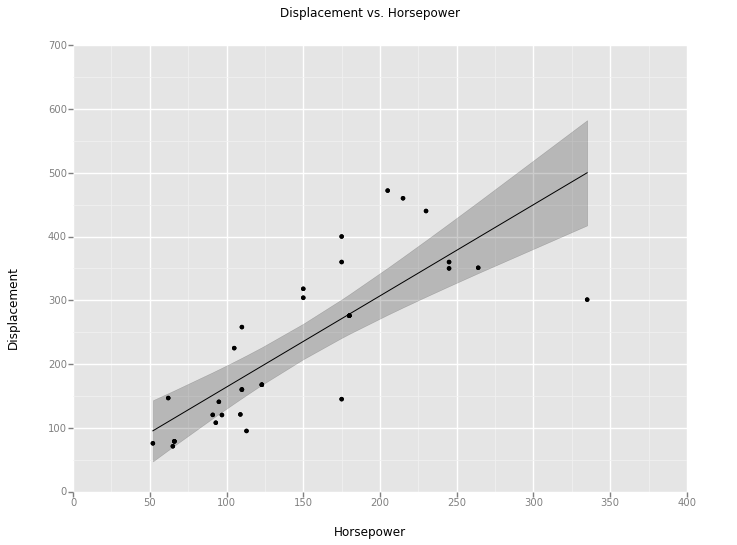

<ggplot: (24071614)>

In [25]:
disp_hp_smooth_wg =  disp_hp + geom_point() + stat_smooth()

disp_hp_smooth_wg

The smooth that `stat_smooth` chose appears linear with larger error bars near the ends of the data, adding evidence to our suspicions.  

If we were curious about a particular model type we could change the method of `stat_smooth` with the added `method` parameter.

In [ ]:
disp_hp_lm_wg = disp_hp + geom_point() + stat_smooth(method = "loess")

disp_hp_lm_wg

Above is the same plot with a different smooth that we tried.

We can remove the standard error bars from the smooth line with the paramter `se`.

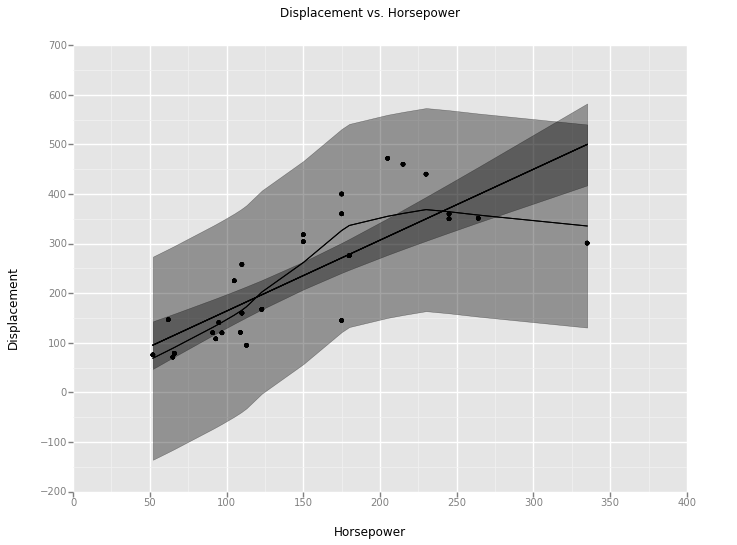

<ggplot: (24071614)>

In [58]:
disp_hp_lmse_wg = disp_hp + geom_point() + stat_smooth(method = "lm", se = False)

disp_hp_lmse_wg

## Themes

The last topic we will cover in this tutorial is themes.  While themes are not a statistical choice, they are an important part of proper visualizations.  We will plot a histogram of `price` of the `diamonds` dataset using the standard ggplot theme.

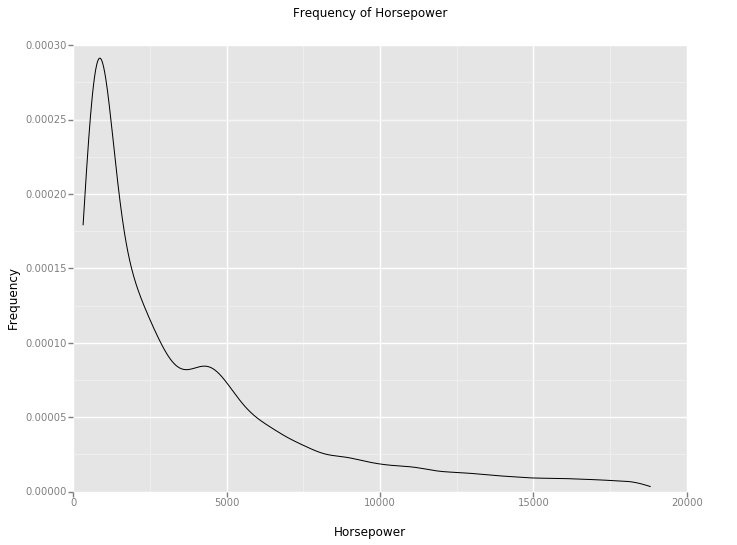

<ggplot: (27284856)>

In [59]:
price_density = ggplot(diamonds, aes(x = "price"))
price_density = price_density + \
                    xlab("Horsepower") + \
                    ylab("Frequency") + \
                    ggtitle("Frequency of Horsepower") 
            
            
price_density_wg = price_density + geom_density()

price_density_wg


Below we have plotted the same plot with our own theme, aptly named `our_theme`.

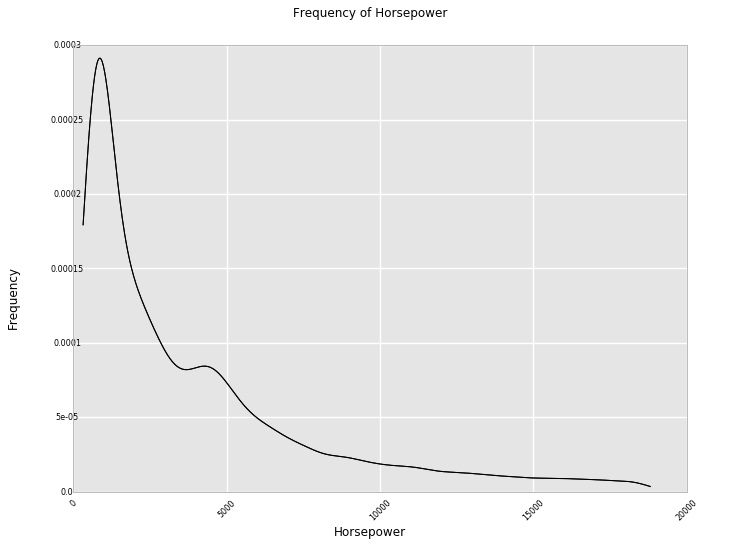

<ggplot: (17076901)>

In [9]:
our_theme = theme(axis_text=element_text(size=8, color='black'), x_axis_text=element_text(angle=45))

price_density_theme =  price_density + geom_density() + our_theme

price_density_theme

We can see that our theme changed the orientation of the numbers on the x-axis as well as the sizes of the numbers.  While there are other stylistic choices one could make in writing a theme, we chose to keep it simple.

## Conclusion

In this tutorial we have covered the important elements of the ggplot package.  We recommend recreating our examples with different colors, themes and other asthetic choices until the user is satisified.  Any questions not addressed in this tutorial are addressed in the ggplot documentation which can be found here: https://github.com/yhat/ggplot